In [1]:
import pandas as pd
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['sans-serif'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False 
df = pd.read_excel('final_210423.xlsx',engine='openpyxl')

df =df.head(2500)

In [2]:

df = df.drop(['Date de création',  'Date de modification','Nom du fichier'], axis=1)

In [3]:
df['Messages']=df['Messages'].astype(str)

In [4]:
from langdetect import detect

In [5]:
texl70 = df['Messages']
langdet = []
    
for i in range(len(df)):                                         
    try:                                                          
        lang=detect(texl70[i])                                      
    except:                                                       
        lang=''                                                  
        print("This row throws error:", texl70[i])                 
    langdet.append(lang) 

This row throws error:  
This row throws error: ‌
This row throws error:    
This row throws error:    
This row throws error:    
This row throws error:    
This row throws error:    


In [6]:
df['lang']=langdet
df.head()

,Messages,catégorie,lang
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",contrat,fr
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,commande de badge,fr
2,"Bonjour, J’ai essayé de faire la modification...",contrat,fr
3,"Bonjour, merci de me faire un badge avec la gé...",commande de badge,fr
4,No Message,no message,de


In [7]:
df=df.loc[df['lang']=='fr']
df.shape

(1741, 3)

In [8]:
df = df[pd.notnull(df['catégorie'])]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 2332
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Messages   1627 non-null   object
 1   catégorie  1627 non-null   object
 2   lang       1627 non-null   object
dtypes: object(3)
memory usage: 50.8+ KB


In [10]:
col = ['Messages', 'catégorie']
df = df[col]

In [11]:
df.columns

Index(['Messages', 'catégorie'], dtype='object')

In [12]:
df.columns = ['Messages', 'catégorie']

In [13]:
df['category_id'] = df['catégorie'].replace({ 'contrat' : 0,'demande de renseignement' : 1,'interne Axxès' : 2 ,'renseignement facture' : 3, 'commande de badge' : 4, 'réclamation qualité de service' : 5,'réclamation facture':6,'remplacement badge':7,'réclamation logistique':8,
                                           'amende Belgique':9,'no message':10})


In [14]:
from io import StringIO
category_id_df = df[['catégorie', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'catégorie']].values)

In [15]:
id_to_category

{0: 'contrat',
 1: 'demande de renseignement',
 2: 'interne Axxès',
 3: 'renseignement facture',
 4: 'commande de badge',
 5: 'réclamation qualité de service',
 6: 'réclamation facture',
 7: 'remplacement badge',
 8: 'réclamation logistique',
 9: 'amende Belgique',
 10: 'no message'}

In [16]:
df.head()

,Messages,catégorie,category_id
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",contrat,0
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,commande de badge,4
2,"Bonjour, J’ai essayé de faire la modification...",contrat,0
3,"Bonjour, merci de me faire un badge avec la gé...",commande de badge,4
5,"Bonjour, L'appareil 3156490017550003485 a été ...",réclamation qualité de service,5


In [17]:
import warnings

warnings.filterwarnings("ignore", message="Glyph 146 missing from current font.")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif


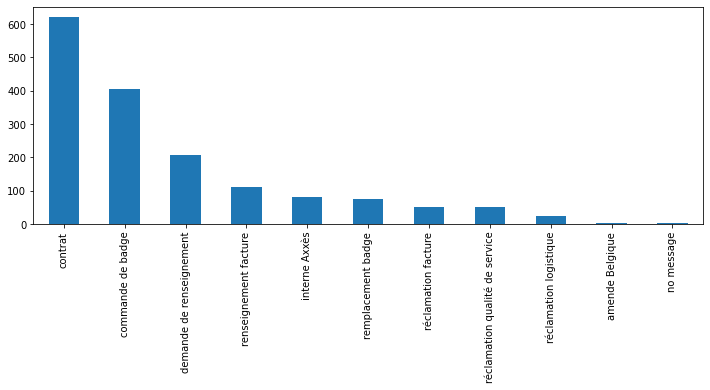

In [18]:
my_tags = df['catégorie']
plt.figure(figsize=(12,4))
my_tags.value_counts().plot(kind='bar');

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

final_stopwords_list = stopwords.words('english') + stopwords.words('french')
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words = final_stopwords_list)

features = tfidf.fit_transform(df.Messages).toarray()
labels = df.category_id
features.shape

(1627, 8499)

In [20]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for df.Messages, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(df.catégorie))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# '0                              contrat
1                    commande de badge
2                              contrat
3                    commande de badge
5       réclamation qualité de service
                     ...              
2324                 commande de badge
2325                 commande de badge
2328             renseignement facture
2329                           contrat
2332                           contrat
Name: catégorie, Length: 1627, dtype: object':
  . Most correlated unigrams:
       . collecter
       . 521
  . Most correlated bigrams:
       . être branché
       . prendre charge
# '0                              contrat
1                    commande de badge
2                              contrat
3                    commande de badge
5       réclamation qualité de service
                     ...              
2324                 commande de badge
2325                 commande de badge
2328             renseignement facture
2329                          

In [21]:
my_tag = ['contrat','commande de badge','no message','renseignement facture','réclamation facture','remplacement badge','interne Axxès',
         'réclamation qualité de service','demande de renseignement','réclamation logistique','amende Belgique']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df['Messages'], df['catégorie'], random_state = 42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred = clf.predict(count_vect.transform(X_test))


In [23]:
print(clf.predict(count_vect.transform(["Bonjour,Ci-joint le mandat sepa et le rib.CordialementBLACKSTONEBertrand STRAZELTel"])))

['contrat']


In [24]:
print(clf.predict(count_vect.transform([" Bonjour, J’ai essayé de faire la modification du badge du EC 418 KS initialement en classe 4 que nous avons vendu et remplacé par une classe 3 immatriculé"])))

['contrat']


In [25]:
print(clf.predict(count_vect.transform(["Bonjour, merci de me faire un badge avec la géolocalisation intégré pour ce véhiculeMon code client 00448200001 Bien à vousJulien JEZEQUEL-------- Message transféré -------- Sujet : Carte grise FG 956 WRDate : Wed, 19 Aug 2020 15:07:06 +0200De : Contact Déménagements Jézéquel <contact@demenagements-jezequel.com>Pour : Julien Jézéquel <>Julien,Ci-joint la carte grise du camion de Mike.Cordialement,Pascale"])))

['contrat']


In [26]:
df[df['Messages'] == "No Message"]

,Messages,catégorie,category_id


In [27]:
df[df['Messages'] == "commande de badge"]

,Messages,catégorie,category_id


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\bertille.lekeufack\.conda\envs\stage1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\bertille.lekeufack\.conda\envs\stage1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\bertille.lekeufack\.conda\envs\stage1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\bertille.lekeufack\.conda\envs\stage1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("

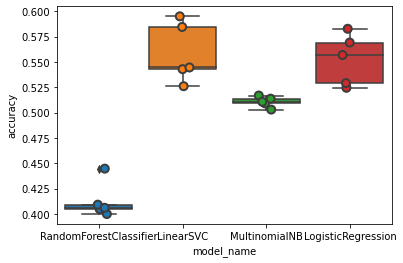

In [29]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [30]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.558684
LogisticRegression        0.552549
MultinomialNB             0.510762
RandomForestClassifier    0.413016
Name: accuracy, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


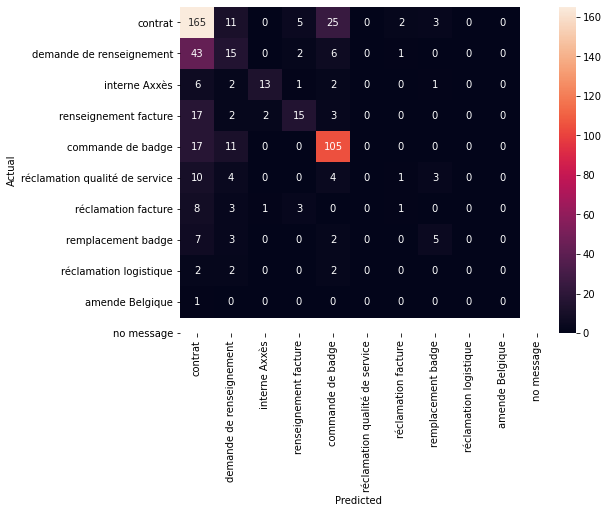

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.catégorie.values, yticklabels=category_id_df.catégorie.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [56]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual:
            #print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            m=df.loc[X_test.index==indices_test]
            pred = pd.DataFrame({
                    'index':indices_test,
                    'actual': y_test, 
                    'predicted':y_pred,
                    'Messages': m.Messages
                   })
pred.head(30)
           
           

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [62]:
a=set(y_test) - set(y_pred)
a

{5, 8, 10}

In [ ]:
print(category_id_df)

In [ ]:
from IPython.display import display

for predicted in df.category_id:
    for actual in df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
                print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
                display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['catégorie', 'Messages']])
                print('')

In [ ]:
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 6:
            print("'{}' predicted as '{}' : {} examples.".format(df.catégorie[actual], df.catégorie[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['catégorie', 'Messages']])
            print('')

In [ ]:
model.fit(features, labels)

In [ ]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

In [ ]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=my_tag))